In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
aerofit_df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DS & ML/Projects/Aerofit/aerofit.xlsx')

In [ ]:
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


##1.Problem statement

**We have to analyze the data and come to a segmentation process. This actually helps us in classifying a set of people to a specific product i.e which product is more suitable to which set of people.**

### shape of data, statistical summary and data types

In [ ]:
aerofit_df.shape

(180, 9)

In [ ]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
print('The unique values are:')
for i in aerofit_df.columns:
  print(f"{i} -{len(aerofit_df[i].unique())}")

The unique values are:
Product -3
Age -32
Gender -2
Education -8
MaritalStatus -2
Usage -6
Fitness -5
Income -62
Miles -37


From the above analysis the caegorical columns are
1. Product
2. Gender
3. Education
4. MaritalStatus
5. Usage
6. Fitness

In [ ]:
aerofit_df['Usage'].unique(), aerofit_df['Education'].unique(), aerofit_df['MaritalStatus'].unique(), aerofit_df['Fitness'].unique()

(array([3, 2, 4, 5, 6, 7]),
 array([14, 15, 12, 13, 16, 18, 20, 21]),
 array(['Single', 'Partnered'], dtype=object),
 array([4, 3, 2, 1, 5]))

In [ ]:
categorical_columns=['Product','Gender','Education','MaritalStatus','Usage','Fitness']
# for i in categorical_columns:
#   aerofit_df[i]=aerofit_df[i].astype('category')


In [ ]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


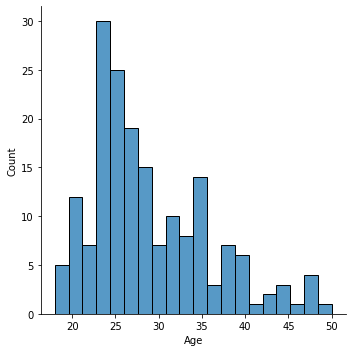

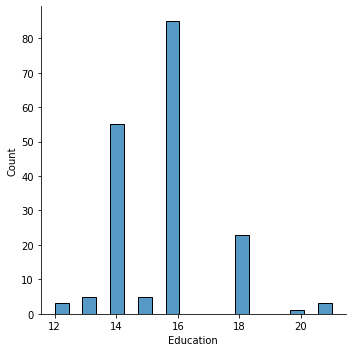

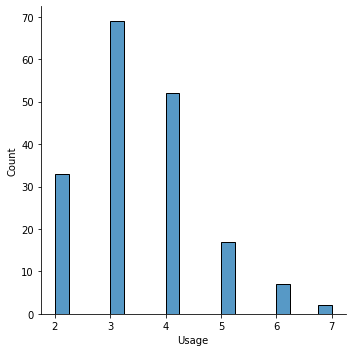

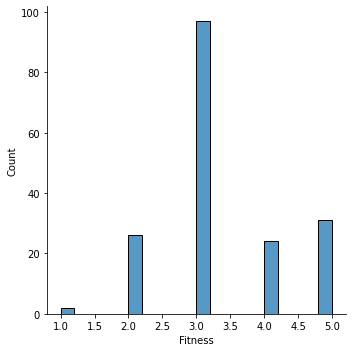

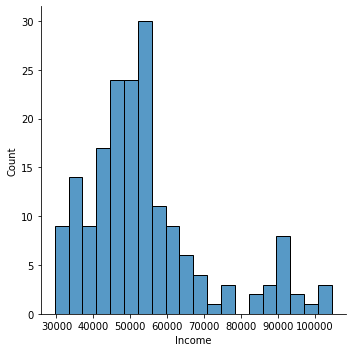

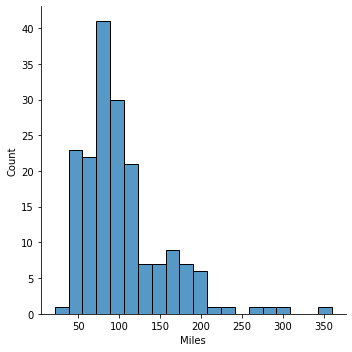

In [ ]:
for i in aerofit_df.describe():
  sns.displot(aerofit_df[i],bins=20)
  plt.show()

**Looks like all columns range is acceptable.**

**Age is within the range of 18,50.**

**Miles max value is 360 means daily walk max is 12 miles which also seems acceptable. But, from the displot there are very less count on the higher side of miles and hence we can consider as outliers.**

**Income also seems there are no outliers**

##4.Missing value and Outlier detection

In [ ]:
aerofit_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**No missing values**

In [ ]:
q1=aerofit_df['Miles'].quantile(0.25)
q3=aerofit_df['Miles'].quantile(0.75)
IQR=q3-q1

In [ ]:
aerofit_df=aerofit_df[(aerofit_df['Miles']<q3+1.5*(IQR)) & (aerofit_df['Miles']>q1-1.5*(IQR))]
aerofit_df.shape

(167, 9)

**Outliers are eliminated**

##2.Non Graphical analysis

In [ ]:
for i in categorical_columns:
  print(aerofit_df[i].value_counts())
  print('_________')

KP281    79
KP481    59
KP781    29
Name: Product, dtype: int64
_________
Male      97
Female    70
Name: Gender, dtype: int64
_________
16    80
14    53
18    18
15     5
13     5
12     3
21     2
20     1
Name: Education, dtype: int64
_________
Partnered    98
Single       69
Name: MaritalStatus, dtype: int64
_________
3    69
4    49
2    33
5    12
6     3
7     1
Name: Usage, dtype: int64
_________
3    97
2    26
4    22
5    20
1     2
Name: Fitness, dtype: int64
_________


##3.Visual Analysis

### Uivariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


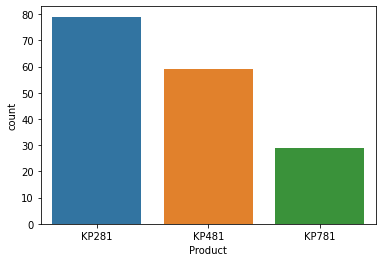

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


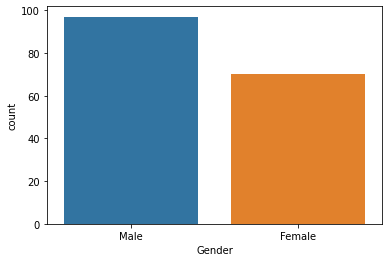

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


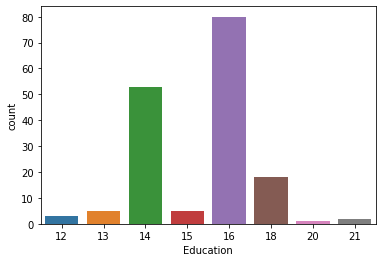

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


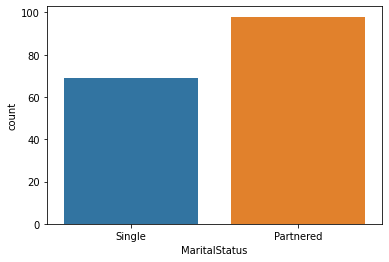

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


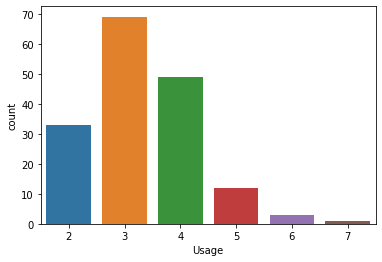

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


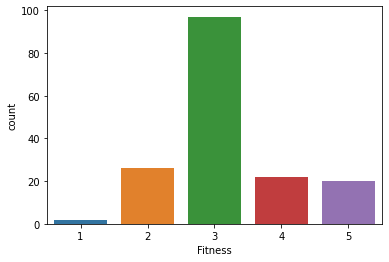

In [ ]:
for i in categorical_columns:
  sns.countplot(aerofit_df[i])
  plt.show()

### Bivariate analysis

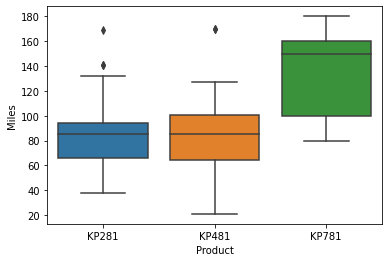

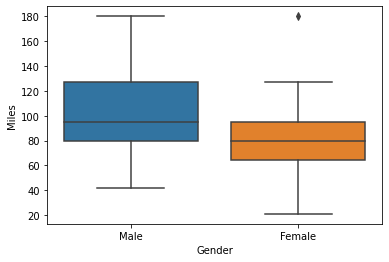

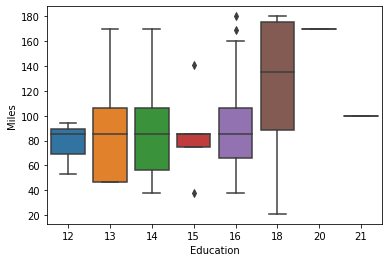

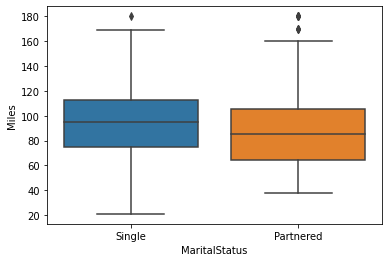

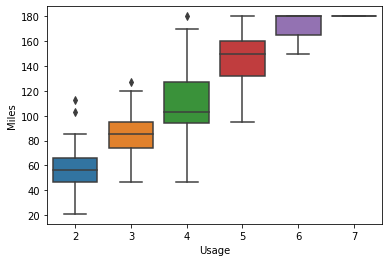

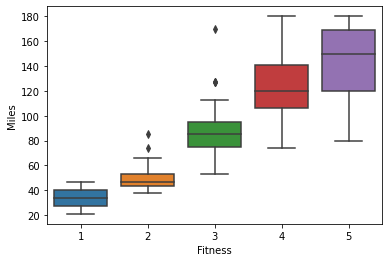

In [ ]:
for i in categorical_columns:
  sns.boxplot(x=i,y='Miles',data=aerofit_df)
  plt.show()

**1.With KP781 the average miles covered is more than the other 2 products, which means whoever wants to cover more distance we can prefer the KP 781 product**

**2.Male customers are generally covering more miles average than female customers**

**3.Education, this category is not showing any strong evidence w.r.t miles and all eductaion backgrounds show more or less the same avaerage miles**

**4.If single the average miles is more**

**5.More usage means more miles are covering**

**6.More star rating means obviously more usage and more miles**

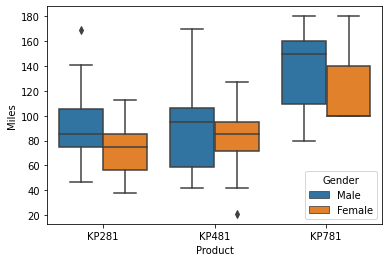

In [ ]:
#Gender vs miles
sns.boxplot(x='Product',y='Miles',data=aerofit_df,hue='Gender')
plt.show()

**Male customers are going for more miles**

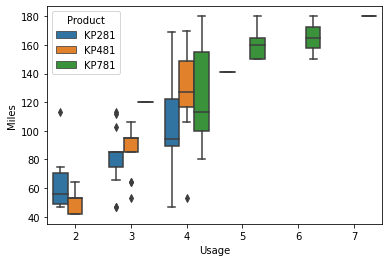

In [ ]:
# Male customers as per their usage
sns.boxplot(x='Usage',y='Miles',data=aerofit_df[aerofit_df['Gender']=='Male'],hue='Product')
plt.show()

**So, from here we can say for men for less usage  we can recommend the KP281 product, for medium usage KP481 and more usage KP781**

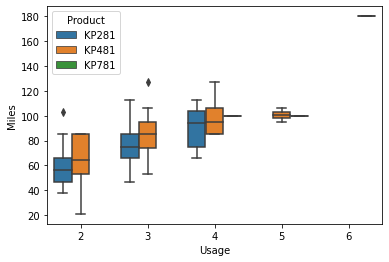

In [ ]:
# female customers as per their usage
sns.boxplot(x='Usage',y='Miles',data=aerofit_df[aerofit_df['Gender']=='Female'],hue='Product')
plt.show()

**From here majorly women choses the KP481 for less and medium usage**

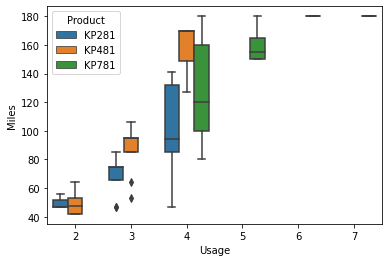

In [ ]:
# Male partnered customers as per the usage
sns.boxplot(x='Usage',y='Miles',data=aerofit_df[(aerofit_df['MaritalStatus']=='Partnered')&(aerofit_df['Gender']=='Male')],hue='Product')
plt.show()

**So for partnered men also low and medium usgae preferring the KP481 and for high usage kP781**

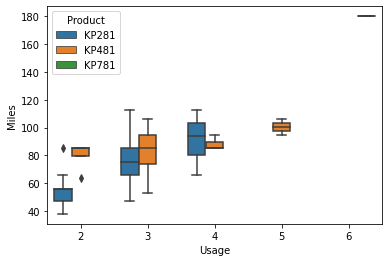

In [ ]:
# female partnered customers as per their usage
sns.boxplot(x='Usage',y='Miles',data=aerofit_df[(aerofit_df['MaritalStatus']=='Partnered')&(aerofit_df['Gender']=='Female')],hue='Product')
plt.show()

**Partnered are choosing the KP481 product. So, we can recommend this product to partnered female customers**

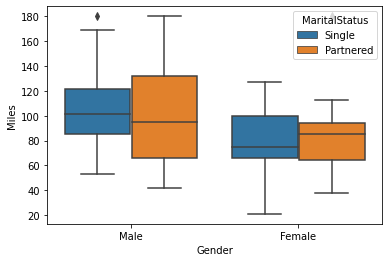

In [ ]:
# Marital status vs miles
sns.boxplot(x='Gender',y='Miles',data=aerofit_df,hue='MaritalStatus')
plt.show()

**Male singles are covering more miles followed by male partnered followed by female partnered, followed by female single on an average**

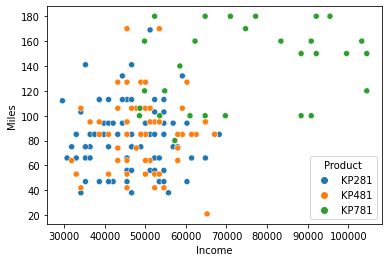

In [ ]:
sns.scatterplot(x='Income',y='Miles',data=aerofit_df,hue='Product')
plt.show()

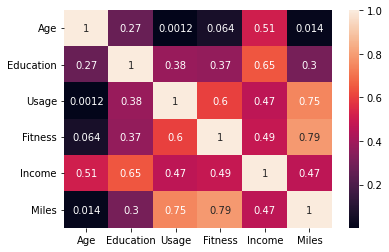

In [ ]:
sns.heatmap(aerofit_df.corr(),annot=True)

There are few that are correlated
1. Age and Income
2. Education and Income
3. Usage and Fitness, Usage and Miles
4. Fitness and Miles

In [ ]:
# Marginal probability
pd.crosstab(index=aerofit_df['Usage'],columns=aerofit_df['Product'],normalize=True,margins=True)

Product,KP281,KP481,KP781,All
Usage,,,,
2,0.113772,0.083832,0.000000,0.197605
3,0.221557,0.185629,0.005988,0.413174
4,0.131737,0.071856,0.089820,0.293413
5,0.005988,0.011976,0.053892,0.071856
6,0.000000,0.000000,0.017964,0.017964
7,0.000000,0.000000,0.005988,0.005988
All,0.473054,0.353293,0.173653,1.000000


**So the 3 usage people are more with a probability of 0.413**

**If you consider the higher usage people more are opting for KP781**

In [ ]:
# Marginal Probability
pd.crosstab(index=aerofit_df['Gender'],columns=aerofit_df['Product'],normalize=True,margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.233533,0.167665,0.017964,0.419162
Male,0.239521,0.185629,0.155689,0.580838
All,0.473054,0.353293,0.173653,1.000000


So marginal probabilities are as follows:

**1. KP281 - 0.47**

**2. KP481 - 0.35**

**3. KP781 - 0.17**

In [ ]:
# Conditional Probability
pd.crosstab(index=aerofit_df['Gender'],columns=aerofit_df['Product'],normalize='index',margins=True)

Product,KP281,KP481,KP781
Gender,,,
Female,0.557143,0.400000,0.042857
Male,0.412371,0.319588,0.268041
All,0.473054,0.353293,0.173653


So conditional probabilities  for the products are as follows:

**1. Product/Female - 0.55, 0.40, 0.04**

**2. Product/Male - 0.41, 0.31, 0.26**

**3. Product/(Male,Female) - 0.47, 0.35, 0.17**

In [ ]:
# Conditional Probability
pd.crosstab(index=aerofit_df['Gender'],columns=aerofit_df['Product'],normalize='columns',margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.493671,0.474576,0.103448,0.419162
Male,0.506329,0.525424,0.896552,0.580838


So conditional probabilities  for the products are as follows:

**1. Female/Product - 0.49, 0.47, 0.10**

**2. Male/Product - 0.50, 0.52, 0.89**

**3. Gender/(All products) - 0.41, 0.58**

In [ ]:
## Consider people who are married
married_df=aerofit_df[aerofit_df['MaritalStatus']=='Partnered']
pd.crosstab(index=married_df['Gender'],columns=married_df['Product'],normalize='index',margins=True)


Product,KP281,KP481,KP781
Gender,,,
Female,0.634146,0.341463,0.024390
Male,0.368421,0.368421,0.263158
All,0.479592,0.357143,0.163265


So, for the married ones

**Product/Female - 0.63,0.34,0.024**

**Product/Male - 0.36,0.36,0.26**


##5. Business Insights

**From the above analysis:**

**It was found that generally more are opting the KP281 machine, But if you filter out as per the uasage or as per marital status KP781 was the machine that was opting by more customers**

##6. Recommendations

**The conclusion from analysis is many are low to medium users and we should make more variants or products in the KP281 series we can make good business**

**The married ones with more usage are preferring KP781 and should focus on this machine if we target the former one.**